
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - polynomial regression <br>
<font color=696880 size=4>
Ali Rahimi Akbar

____

#Personal Data

In [107]:
# Set your student number and name
student_number = 401105901
Name = 'Amirardalan'
Last_Name = 'Dehghanpour'

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.


## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-3 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [108]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
   X = np.random.uniform(low=range_start, high=range_end, size=num_samples)
   y = 0.1 * X**6 - 2 * X**3 + 7 * X**2 - 9 * X + 3
   noise = np.random.normal(loc=0, scale=noise_std, size=num_samples)
   y_noisy = y + noise
   return X,y_noisy


    # TODO

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 4 to 6.**

In [109]:
from sklearn.model_selection import train_test_split
X, y = generate_dataset(-3,-1,1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_test2, y_test2 = generate_dataset(4,6,500)

#TODO

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 12. You can't use sklearn library for this section

In [110]:
class PolynomailRegression() :

    def __init__( self, degree, learning_rate = 0.01, iterations =50000) :
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.mean=0
        self.std=0
        # initialize  model

    def fit( self, X, Y ) :
       self.mean=np.mean(X)
       self.std=np.std(X)
       X_normalize=(X-self.mean)/self.std
       X_poly=np.vstack([X_normalize**i for i in range(self.degree + 1)]).T
       self.weights = np.zeros(X_poly.shape[1])
       for _ in range(self.iterations):
            predictions = X_poly @ self.weights
            errors = predictions - Y
            gradient = ( 2*(X_poly.T @ errors) / len(X)  ) +( 0.01 * self.weights)
            gradient = np.clip(gradient, -1,1)

            self.weights -= self.learning_rate * gradient

       return self

        # input : X and Y for fit model with gradient descent and return Self

    # predict

    def predict( self, X ) :
       X_normalize=(X-self.mean)/self.std
       X_poly=np.vstack([X_normalize**i for i in range(self.degree + 1)]).T
       return X_poly @ self.weights

        # Get X and return predicted value from model

## 4. Model Evaluation (15 Points)
Evaluate the models on both train and test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.

In [111]:
from sklearn.metrics import mean_squared_error
def make_models():
  models={}
  for degree in range(2, 13):
    model = PolynomailRegression(degree=degree)
    model.fit(X_train, y_train)
    models[degree]=model
  return models
def evaluate_models(models, X_test, y_test,X_train,y_train,X_test2,y_test2):
    results = {}
    for degree, model in models.items():
        y_pred_train = model.predict(X_train)
        y_pred_test=model.predict(X_test)
        y_pred_test2=model.predict(X_test2)
        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        test2_mse = mean_squared_error(y_test2, y_pred_test2)
        results[degree] = (train_mse,test_mse,test2_mse)
    return results
    # TODO

## 5. Plotting your predicted polynomial function

plot your predicted function at degree 5 and 6 and 7 and the base function from question in range -3 to -1.

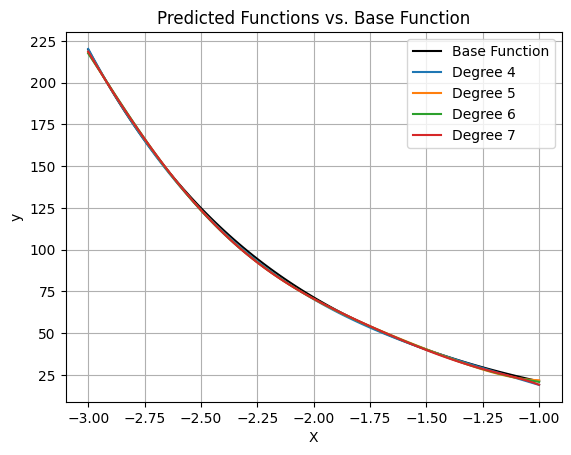

In [112]:
import matplotlib.pyplot as plt

# Define the base function
def base_function(X):
    return 0.1 * X**6 - 2 * X**3 + 7 * X**2 - 9 * X + 3

# Generate range of X values
X_range = np.linspace(-3, -1, 100)

# Plot the base function
plt.plot(X_range, base_function(X_range), label='Base Function', color='black')

 #Plot predicted functions for degrees4,  5, 6, and 7
for degree in [4,5,6,7]:
    model = PolynomailRegression(degree=degree)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_range)
    plt.plot(X_range, y_pred, label=f'Degree {degree}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Predicted Functions vs. Base Function')
plt.legend()
plt.grid(True)
plt.show()


## 6. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and test sets based on the model degree varying from 2 to 12.

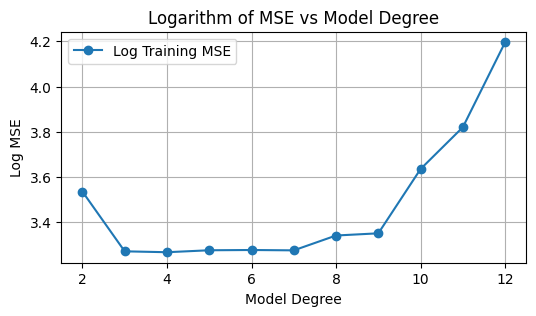

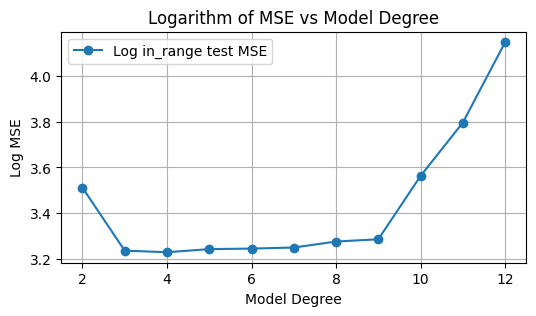

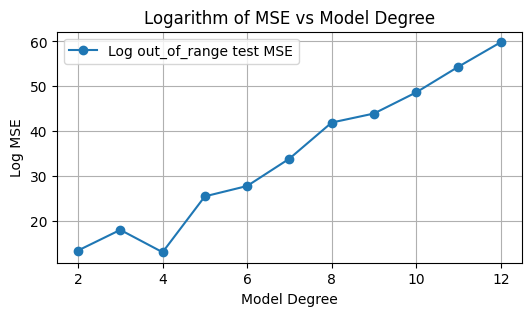

In [113]:
#TODO
models=make_models()
degrees = range(2, 13)
train_mse = []
test_mse = []
test2_mse = []
for degree in degrees:
    model = PolynomailRegression(degree=degree, learning_rate=0.01, iterations=50000)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_test2=model.predict(X_test2)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_test2 = mean_squared_error(y_test2, y_pred_test2)
    train_mse.append(mse_train)
    test_mse.append(mse_test)
    test2_mse.append(mse_test2)
plt.figure(figsize=(6, 3))
plt.plot(degrees, np.log(train_mse), label='Log Training MSE', marker='o')
plt.xlabel('Model Degree')
plt.ylabel('Log MSE')
plt.title('Logarithm of MSE vs Model Degree')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(6, 3))
plt.plot(degrees, np.log(test_mse), label='Log in_range test MSE', marker='o')
plt.xlabel('Model Degree')
plt.ylabel('Log MSE')
plt.title('Logarithm of MSE vs Model Degree')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(6, 3))
plt.plot(degrees, np.log(test2_mse), label='Log out_of_range test MSE', marker='o')
plt.xlabel('Model Degree')
plt.ylabel('Log MSE')
plt.title('Logarithm of MSE vs Model Degree')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion (10 Points)
With comparing the loss of **training set and the test set** specially in higher degrees, what we can conclude about the bias - variance trade off?
in lower degress both in training and test set we saw that we have bias and variance and we have high bias and low variance but both training and test set have big loss,but when we go to higher degrees we saw that in training set loss decreases and also bias decreases but variance increases,but in test set we saw that loss increases beacuse model overfitted and also variance increases and bias decreases,we conculde that find best degree to find optimal point for trade off between bias and variance is necessary.